# Agglomerative clustering tutorial

## What is agglomerative clustering?

Agglomerative clustering is a clustering technique which can be applied in an unsupervised or semi-supervised learning environment.
It is a hierarchical bottom-up clustering method, for which there are multiple algorithms to collate the clusters.
As such, it is useful in situations where the relationship between clusters or otherwise their closeness is an aspect which is desirable to understand.

It can be utilised in a similar manner to KMeans, however there are reasons for which KMeans is preferable for many tasks, chiefly among them the much greater scalability of KMeans with respect to performance or resource efficiency.

The different formulae utilised in this task will be explained later.  The method groups clusters together iteratively until there is a single cluster remaining or an established parameter is met for it to stop otherwise.

In [2]:
import numpy as np;
import pandas as pd;
import time;
import matplotlib.pyplot as plt;

# KMeans method is for KMeans clustering, a centroiding based approach which will be contrasted with Agglomerative clustering.
from sklearn.cluster import KMeans;
from sklearn.cluster import AgglomerativeClustering as AggCl;

# The dendrogram method works in tandem with matplotlib to generate a dendrogram, linkage performs the hierarchical clustering
# determined by selected algorithm.
from scipy.cluster.hierarchy import dendrogram, linkage;

# These imports take sample datasets to contrast KMeans with Agglomerative clustering upon the same data.
from sklearn.datasets import make_blobs;
from skimage import data as skimdata, img_as_float;

### KMeans clustering

KMeans clustering relies upon a predetermined number of clusters on account of its centroiding methodology.  The number of centroids is designated by the number of clusters it will group around them.  
After the number of clusters desired is determined, whether arbitrarily, by elbow plot or by calculation of the optimal silhouette score, the initial centres' locations are placed within the boundary of the dataset randomly.

The points are then assigned to the closest centroid, and their assignment is necessarily exclusive.  Following the attribution of each datapoint to a centroid, the mean position of datapoints in each centroid becomes the new position of the centroid in the next iteration.

This process reiterates until the maximum number of iterations are completed as defined by the set parameters.

In [70]:
# Function for creating scatter plots when fit etc. are complete.
def plot(points, size, colour, marker, title):
    fig, ax = plt.subplots(figsize = (6, 4), dpi = 144);
    ax.set_title(title);
    ax.scatter(points[:, 0], points[:, 1], 
                s = size,
                c = colour, 
                cmap = 'Set3',
                marker = marker);
    ax.set_facecolor((0, 0, 0));

In [11]:
# Function for KMeans clustering.
def KMeansC(clusters, data):
    start = time.time();
    return KMeans(clusters, n_init = 10).fit_predict(data), (time.time() - start);

### Agglomerative clustering linkages

Agglomerative clustering can be tackled through multiple algorithmic approaches which establish the criteria for determining inter-cluster distances, with the goal of clustering based on minimum distance as established by the chosen algorithm.

The single linkage criterion clusters according to the minimal distance between two points of different clusters.

The average linkage criterion clusters according to the minimal average distance between points of one cluster and another.

Complete linkage is a criterion which groups based upon the minimal distance of the farthest point of one cluster to another, as such it is the same as the maximum intra-cluster distance of the new cluster it forms.

The centroid method establishes the mean position of clusters, from which the minimally distanced centroids' clusters are merged to create a cluster.  The use of the mean value can cause the centroid position to be overly influenced by outliers, in which case the following method is more desirable.

Median linkage is the collation of clusters according to the median of paired inter-cluster distances to proof it against outliers.  Clusters are grouped pairwise by the least of these inter-cluster distances relative to other paired cluster distances.

Ward linkage seeks to minimize intra-cluster variance for each step of clustering which is another method which performs well in datasets prone to influence by outliers.

In [5]:
# Function for agglomerative clustering.
def AggCluster(clusters, data, linkage):
    start = time.time();
    if clusters == None: 
        distance_threshold = 0;
    else:
            distance_threshold = None;
    return AggCl(n_clusters = clusters, 
                 distance_threshold = distance_threshold).fit_predict(data), \
        (time.time() - start);

In [152]:
# Cluster number for blobs
# Try changing the number and see how the assignment of them changes in the figures.  Also try with different linkages.
trueClNum = 16;
ClFit = 4;
blobLink = 'Ward';

In [150]:
# Creating blobs to demonstrate the disparity in efficiency.
blobs, bloblabs = make_blobs(n_samples = 5000, 
                             n_features = 2, 
                             centers = trueClNum,
                             random_state = 100);

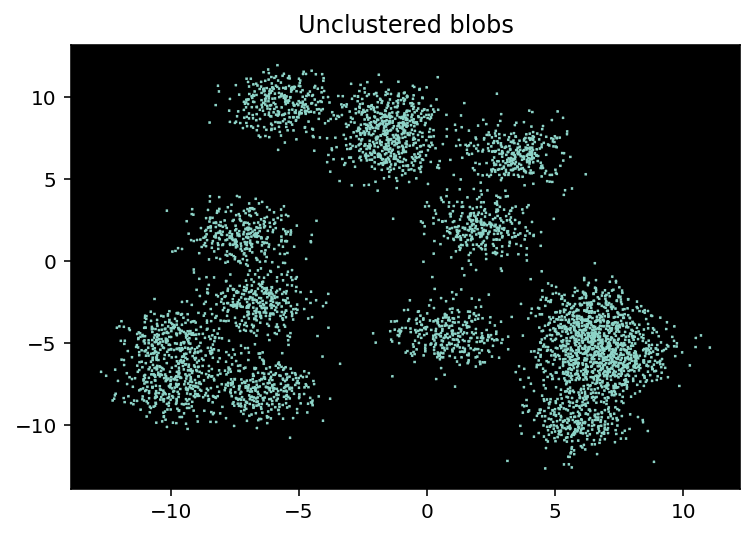

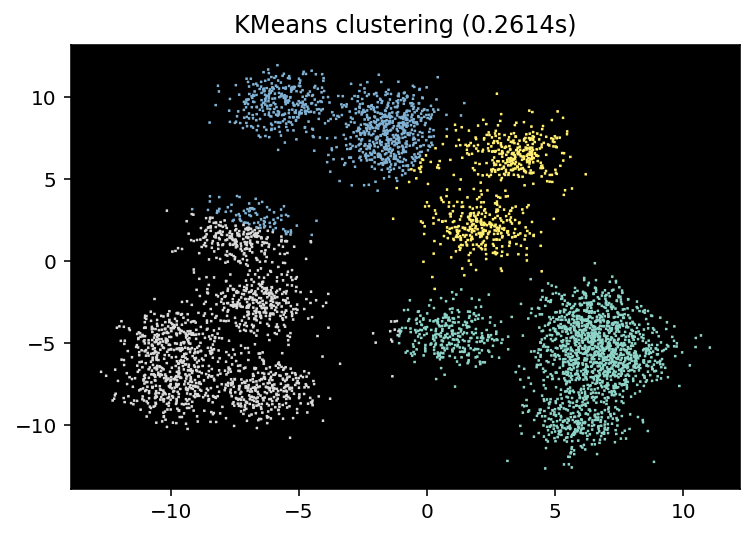

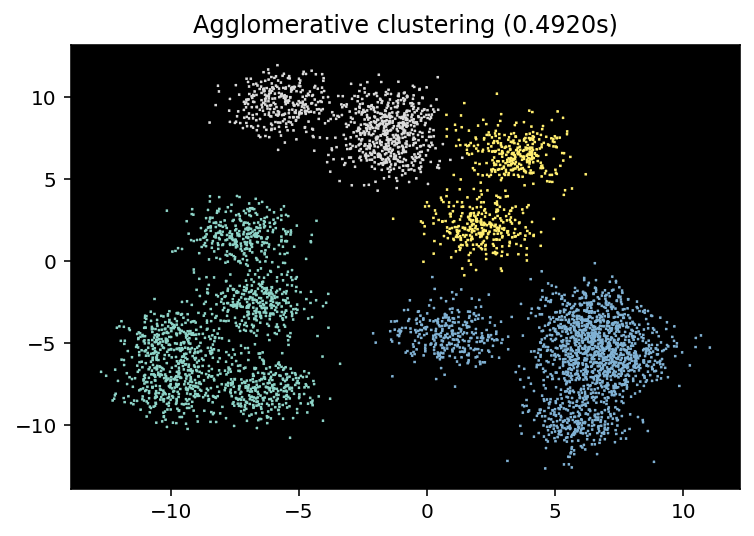

In [153]:
# Assigning clustering to blobs.
KMLabels, KMtime = KMeansC(ClFit, blobs);
ACLabels, ACtime = AggCluster(ClFit, blobs, linkage = blobLink);
plot(blobs, 0.2, np.zeros(len(blobs)), 'x', 'Unclustered blobs');
plot(blobs, 0.2, KMLabels, 'x', f'KMeans clustering ({KMtime:.4f}s)');
plot(blobs, 0.2, ACLabels, 'x', f'Agglomerative clustering ({ACtime:.4f}s)');

You will note that the ratio of time elapsed in the KMeans cluster method opposed to agglomerative demonstrates how much slower agglomerative is.  With the scalability being much worse in comparison this should be used specifically for the hierarchical clustering it is designed for in which the relationship and illustration thereof is desirable, or otherwise in the case which clusters are not expected to be of an equal size or of an unknown quantity.

In [9]:
# Reformatting horse image data for the functions previously defined.
horse = img_as_float(skimdata.horse());
horseX = [];
horseY = [];
for i in range(len(horse)):
    for j in range(len(horse[0])):
        if horse [i][j] == 0:
            horseX.append(j);
            horseY.append(len(horse) - i);
horse = np.stack((horseX, horseY), axis=1);

Try changing the variables below to see how the number of clusters and how they are formed changes respectively.

In [72]:
horseClust = 10;
horseLink = 'average';

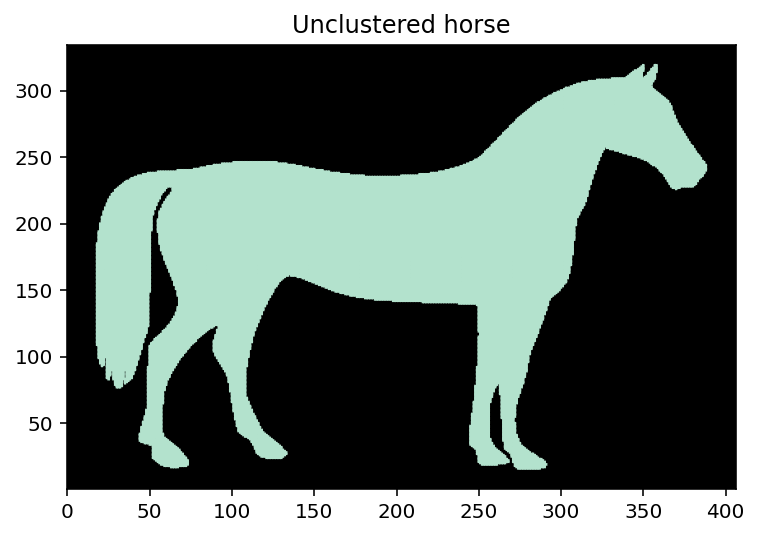

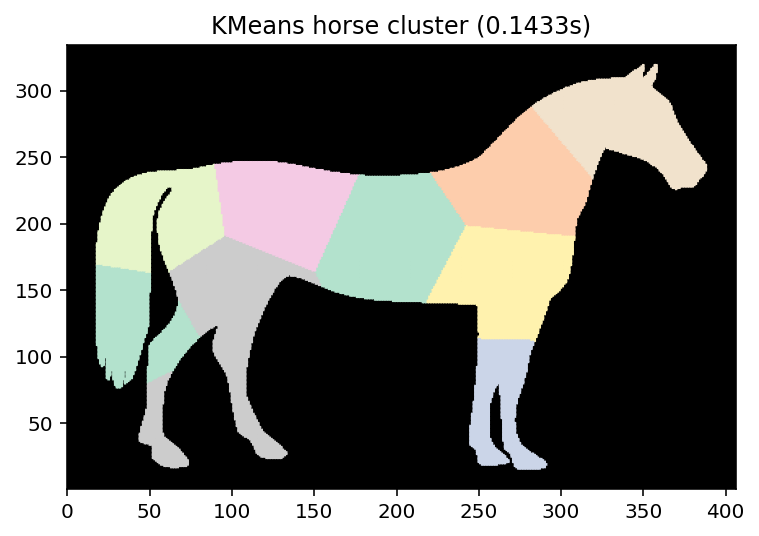

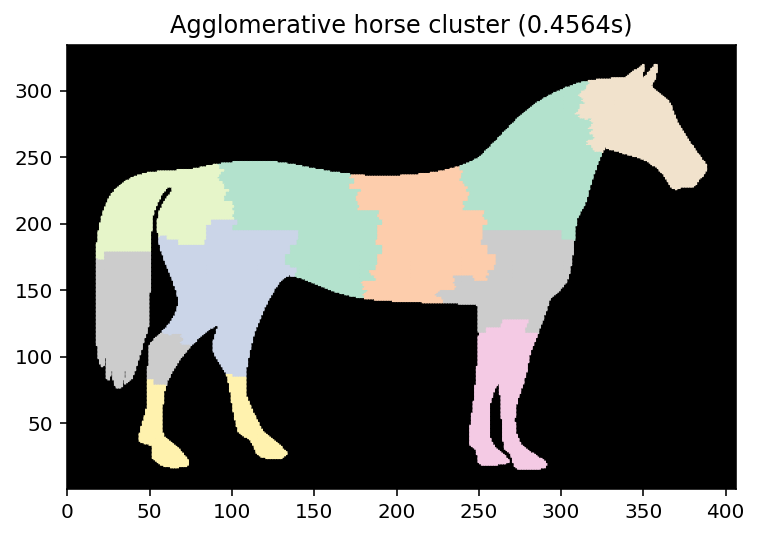

In [68]:
# Fitting and plotting KMeans and agglomerative clustering for the horse data.
horsKMLabels, horsKMtime = KMeansC(horseClust, horse);
horsACLabels, horsACtime = AggCluster(horseClust, horse, linkage = horseLink);
plot(horse, 0.2, np.zeros(len(horse)), 'x', 'Unclustered horse');
plot(horse, 0.2, horsKMLabels, 'x', f'KMeans horse cluster ({KMtime:.4f}s)');
plot(horse, 0.2, horsACLabels, 'x', 'Agglomerative horse cluster '\
                                     f'({ACtime:.4f}s)');

The centroiding approach of KMeans has partitioned the horse image in a highly linear manner, which when clustered through the agglomerative method allowed for a more granular assignment of points to clusters and less linear boundaries for the separation of clusters as well.  Extrapolating from this example, we can know that the agglomerative clustering algorithms would be a more appropriate tool in scenarios where data points one would expect to be clustered together are interwoven with points which ought to be clustered separately, such as in the case of interwoven spiral patterns.

Try altering the type of linkage and see how classification is determined differently.

In [154]:
dendLink = 'complete';

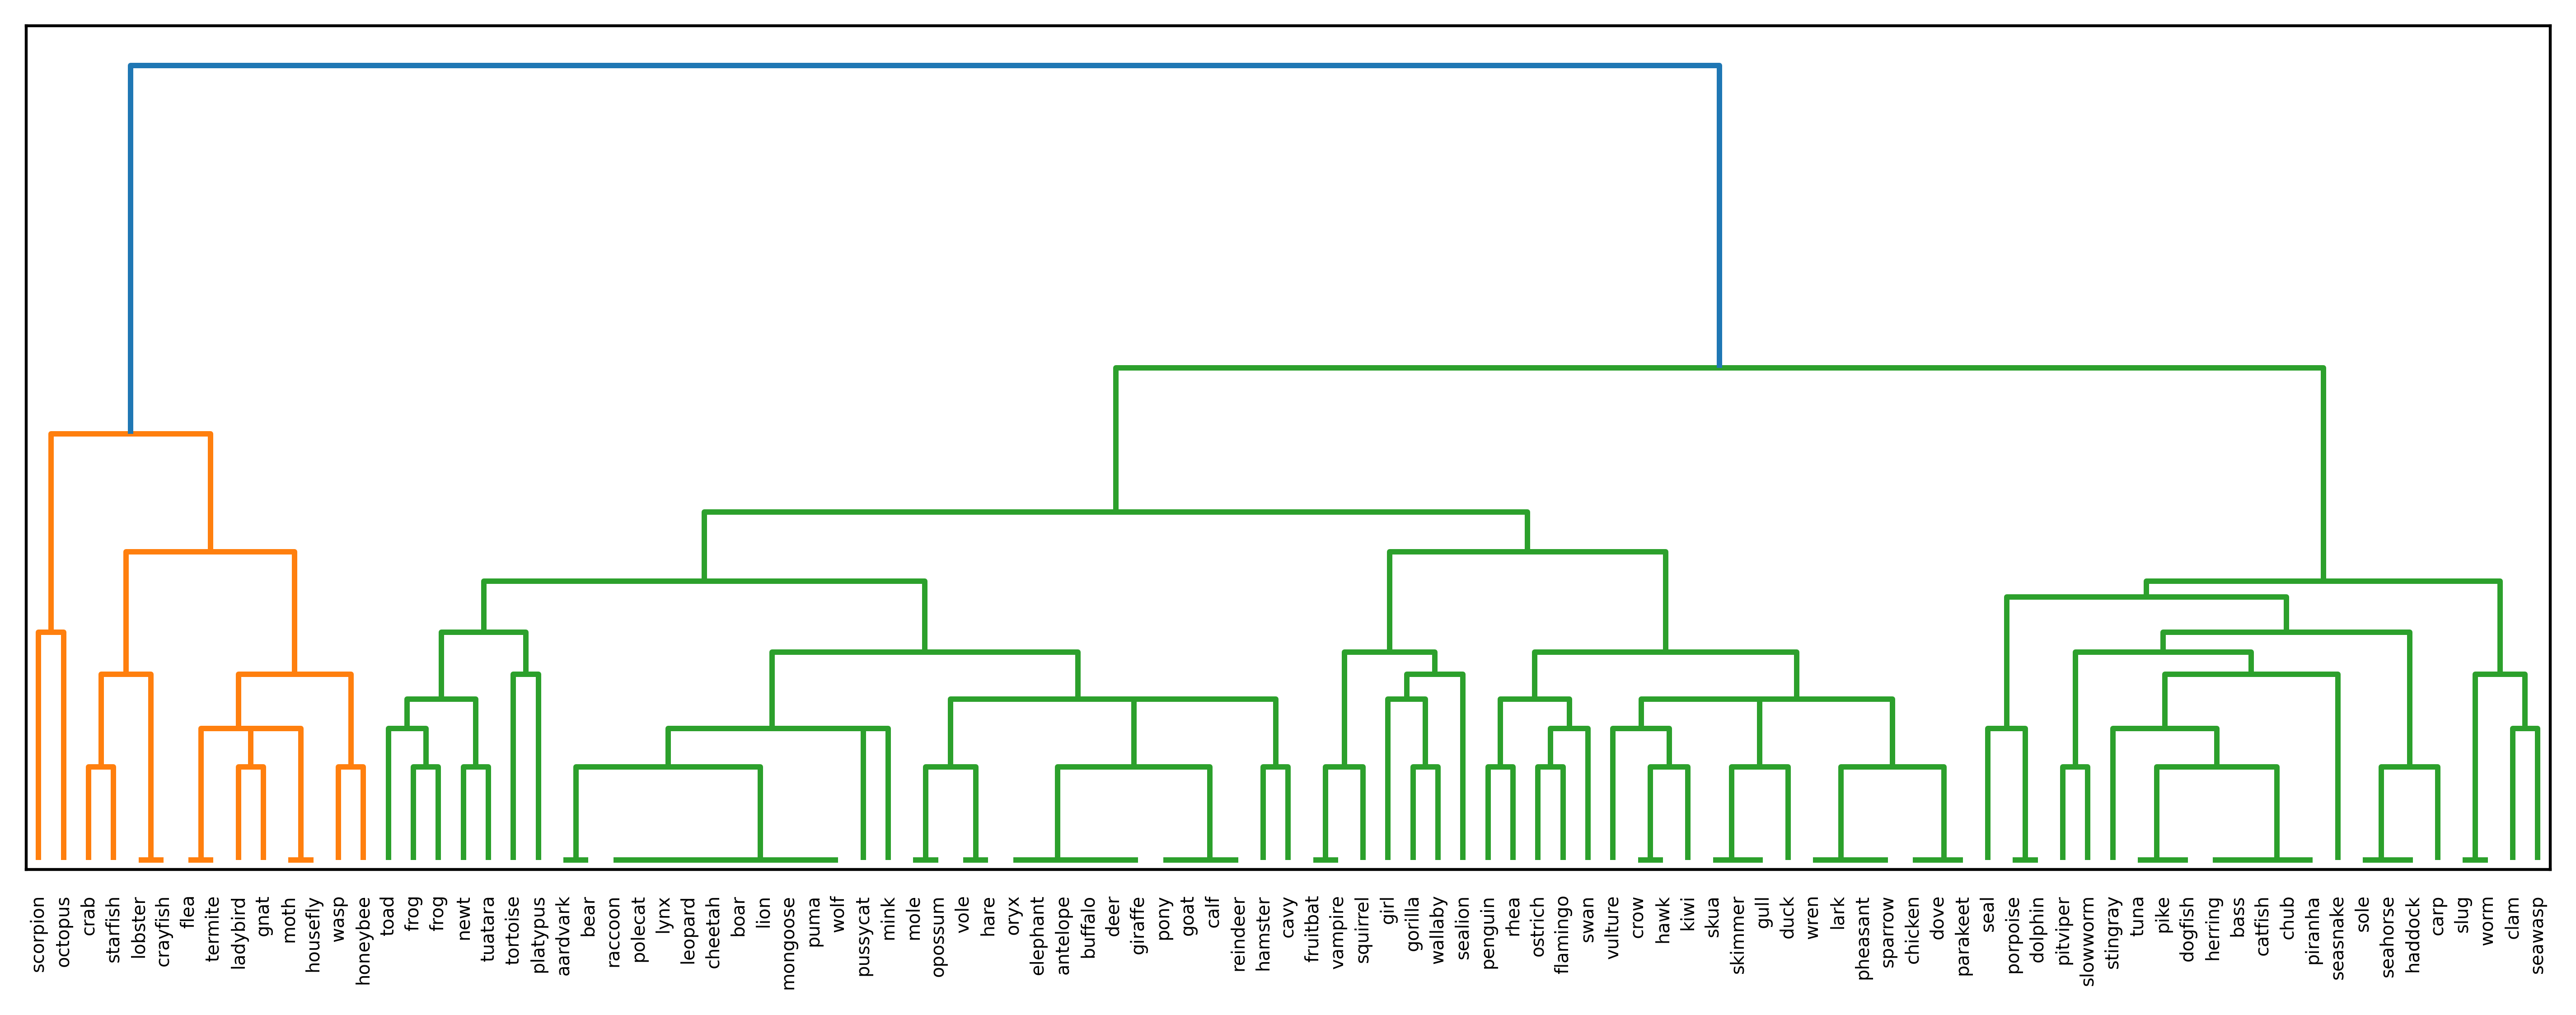

In [155]:
# Opening zoo data in pandas dataframe for agglomerative clustering and
# dendrogram demonstration.
zoo = pd.read_csv('zoo animal classification/zoo.csv', 
                  index_col='animal_name');

zooLink = linkage(zoo.loc[:, :'catsize'], 
                  method = dendLink, 
                  optimal_ordering = True);
zooFig, zooAx = plt.subplots(figsize = (10, 4), 
                    dpi = 576,
                    layout = 'tight');
zooDen = dendrogram(zooLink, labels = zoo.index, ax=zooAx);
zooAx.set_yticks([]);
zooAx.set_ylim(bottom = -0.1);

The above figure utilises the linkage scipy method to cluster in the agglomerative bottom-up hierarchical method.  The data is multi-dimensional and pertains to possession by the animal in the zoo of particular attributes relative to their classification.  As the animals are grouped into an increasingly smaller number of clusters a designation of the desired amount of clusters can be selected, by which a line which bisects the graph vertically can be drawn, discarding all which lies above it and finalising the terminus of the selected number of clusters.

# References

Zoo animals dataset: https://www.kaggle.com/datasets/uciml/zoo-animal-classification?select=zoo.csv

Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu. 1996. A density-based algorithm for discovering clusters in large spatial databases with noise. In Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD'96). AAAI Press, 226–231.

Müllner, D.. 2011. Modern hierarchical, agglomerative clustering algorithms. arXiv preprint arXiv:1109.2378.

G. Karypis, Eui-Hong Han and V. Kumar. Aug. 1999. "Chameleon: hierarchical clustering using dynamic modeling," in Computer, vol. 32, no. 8, pp. 68-75. doi: 10.1109/2.781637.

Chehreghani, M.H. 2018. Reliable Agglomerative Clustering. 2021 International Joint Conference on Neural Networks (IJCNN), 1-8.